# PHYS 381  Assignment \#2

## Student name(s) and UCID(s)

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



## Question #1) 
Using numpy.polynomial.legendre, plot the first five Legendre polynomials between $x=-1$ and $x=+1$.

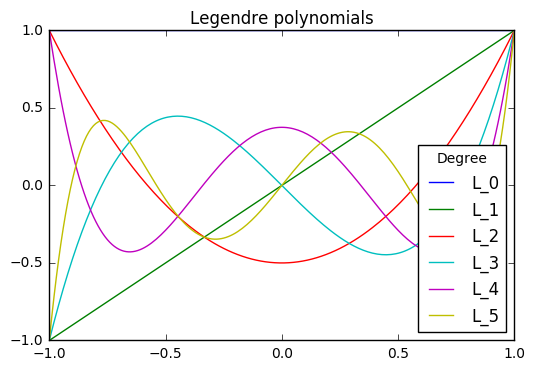

In [5]:
import numpy.polynomial.legendre as lpoly

xrange = np.linspace(-1.0, 1.0, 201)

# The question only asks for "the first five", which presumably means
# $n=0$ to $n=4$ inclusive.  I will also plot $n=5$ to get some guidance
# about where the zeros are located.
#
npoly = 6

for n in range(npoly):
    coeff = np.zeros(npoly)
    coeff[n] = 1.0
    y = lpoly.legval(xrange, coeff)
    plt.plot( xrange, y, label='L_{}'.format(n))
    
plt.legend(loc=0, title='Degree')
plt.title('Legendre polynomials')

## Question #2)
Using scipy.optimize.brentq, find the zeros of the Legendre polynomials for $N=5$.

In [26]:
from scipy.optimize import brentq
coeff5 = [0,0,0,0,0,1.0]
xvalues = np.linspace(-1.0, 1.0, 22) 
xleft = xvalues[0]
yleft = lpoly.legval( xleft, coeff5 )

rootlist = []
for xright in xvalues[1:]:
    yright = lpoly.legval(xright, coeff5 )
    
    if (yleft * yright) <= 0:
        xroot = brentq( lpoly.legval, xleft, xright, args=(coeff5,) )
        print( '{:30.20e} {:30.20e}'.format( xroot, lpoly.legval(xroot, coeff5, ) ) )
        rootlist.append( xroot )
        
    xleft, yleft = xright, yright
        

   -9.06179845938617112289e-01     3.22186721746220428031e-13
   -5.38469310105681220335e-01    -4.60742555219439964276e-15
   -6.93889390390722837765e-18    -1.30104260698260532081e-17
    5.38469310105681220335e-01     4.60742555219439964276e-15
    9.06179845938617112289e-01    -3.22186721746220428031e-13


## Question #3)
Write a function to find zeros using the "secant method".  This is very similar to Newton's method, but uses a discrete estimate for the derivative.

The iteration step is

  $$ x = x_1 - f(x_1) \frac{x_1 - x_0}{f(x_1) - f(x_0)} $$
  
and we stop when the new $x$ is very close to $x_1$ or the new function evaluation $f(x_1)$ is very close to zero.

In [23]:
def my_secant_method( function, x0, x1, args=None, nloops=99 ):
    """Root-finding with the secant method.
    
    Could this be improved in any way? 
    """
    while (nloops > 0):
        nloops -= 1  # guaranteed loop exit
        
        y0 = function(x0, *args)
        y1 = function(x1, *args )
        dx = y1 * (x1-x0) / (y1-y0)
           
        x2 = x1 - dx
        x0, x1 = x1, x2
        
        if (np.abs(dx) <= 1e-10):
            return x2
        

## Question #4)
Apply your secant method function to find the roots of a Legendre polynomial for $N=5$.

Note: we want to break up the search into smaller chunks in order to make sure that any given interval contains zero or one roots.

Note: the secant method seems to be *very* sensitive to the bracket values.  Using $dx$ for the convergence condition seemed to work better than $dy$.

In [25]:
coeff5 = [0,0,0,0,0, 1.0]
xvalues = np.linspace(-1.0, 1.0, 9) 
xleft = xvalues[0]
yleft = lpoly.legval( xleft, coeff5 )

rootlist = []
for xright in xvalues[1:]:
    yright = lpoly.legval(xright, coeff5 )
    
    if (yleft * yright) <= 0:
        xroot = my_secant_method( lpoly.legval, xleft, xright, args=(coeff5,) )
        print( '{:30.20e} {:30.20e}'.format( xroot, lpoly.legval(xroot, coeff5, ) ) )
        rootlist.append( xroot )
        
    xleft, yleft = xright, yright

   -9.06179845938664074723e-01    -3.33066907387546962127e-16
   -5.38469310105683107714e-01     1.11022302462515654042e-16
    0.00000000000000000000e+00     0.00000000000000000000e+00
    0.00000000000000000000e+00     0.00000000000000000000e+00
    5.38469310105683107714e-01    -1.11022302462515654042e-16
    9.06179845938663963700e-01    -1.11022302462515654042e-16


## Summary

The "brentq" routine in the numpy.polynomial module identified 5 roots without any complications.  Using our own "secant method" routine did eventually produce the same results, but required more fiddling around.  We did not make any tests comparing function calls or run time. 